In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
loan_data = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataframe to understand its structure
loan_data.head(), loan_data.info(), loan_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


(    Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001003   Male     Yes          1      Graduate            No   
 1  LP001005   Male     Yes          0      Graduate           Yes   
 2  LP001006   Male     Yes          0  Not Graduate            No   
 3  LP001008   Male      No          0      Graduate            No   
 4  LP001013   Male     Yes          0  Not Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             4583             1508.0       128.0             360.0   
 1             3000                0.0        66.0             360.0   
 2             2583             2358.0       120.0             360.0   
 3             6000                0.0       141.0             360.0   
 4             2333             1516.0        95.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Rural           N  
 1             1.0         Urban           Y  
 2 

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Handling missing values
imputer_mode = SimpleImputer(strategy='most_frequent') # For categorical variables
loan_data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']] = imputer_mode.fit_transform(loan_data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']])

# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    le = LabelEncoder()
    loan_data[column] = le.fit_transform(loan_data[column])
    label_encoders[column] = le

# Check if there are any missing values left
missing_values_after = loan_data.isnull().sum()

loan_data.head(), missing_values_after


(    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 0  LP001003       1        1           1          0              0   
 1  LP001005       1        1           0          0              1   
 2  LP001006       1        1           0          1              0   
 3  LP001008       1        0           0          0              0   
 4  LP001013       1        1           0          1              0   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
 0             4583             1508.0       128.0            360.0   
 1             3000                0.0        66.0            360.0   
 2             2583             2358.0       120.0            360.0   
 3             6000                0.0       141.0            360.0   
 4             2333             1516.0        95.0            360.0   
 
   Credit_History  Property_Area  Loan_Status  
 0            1.0              0            0  
 1            1.0              2            1  


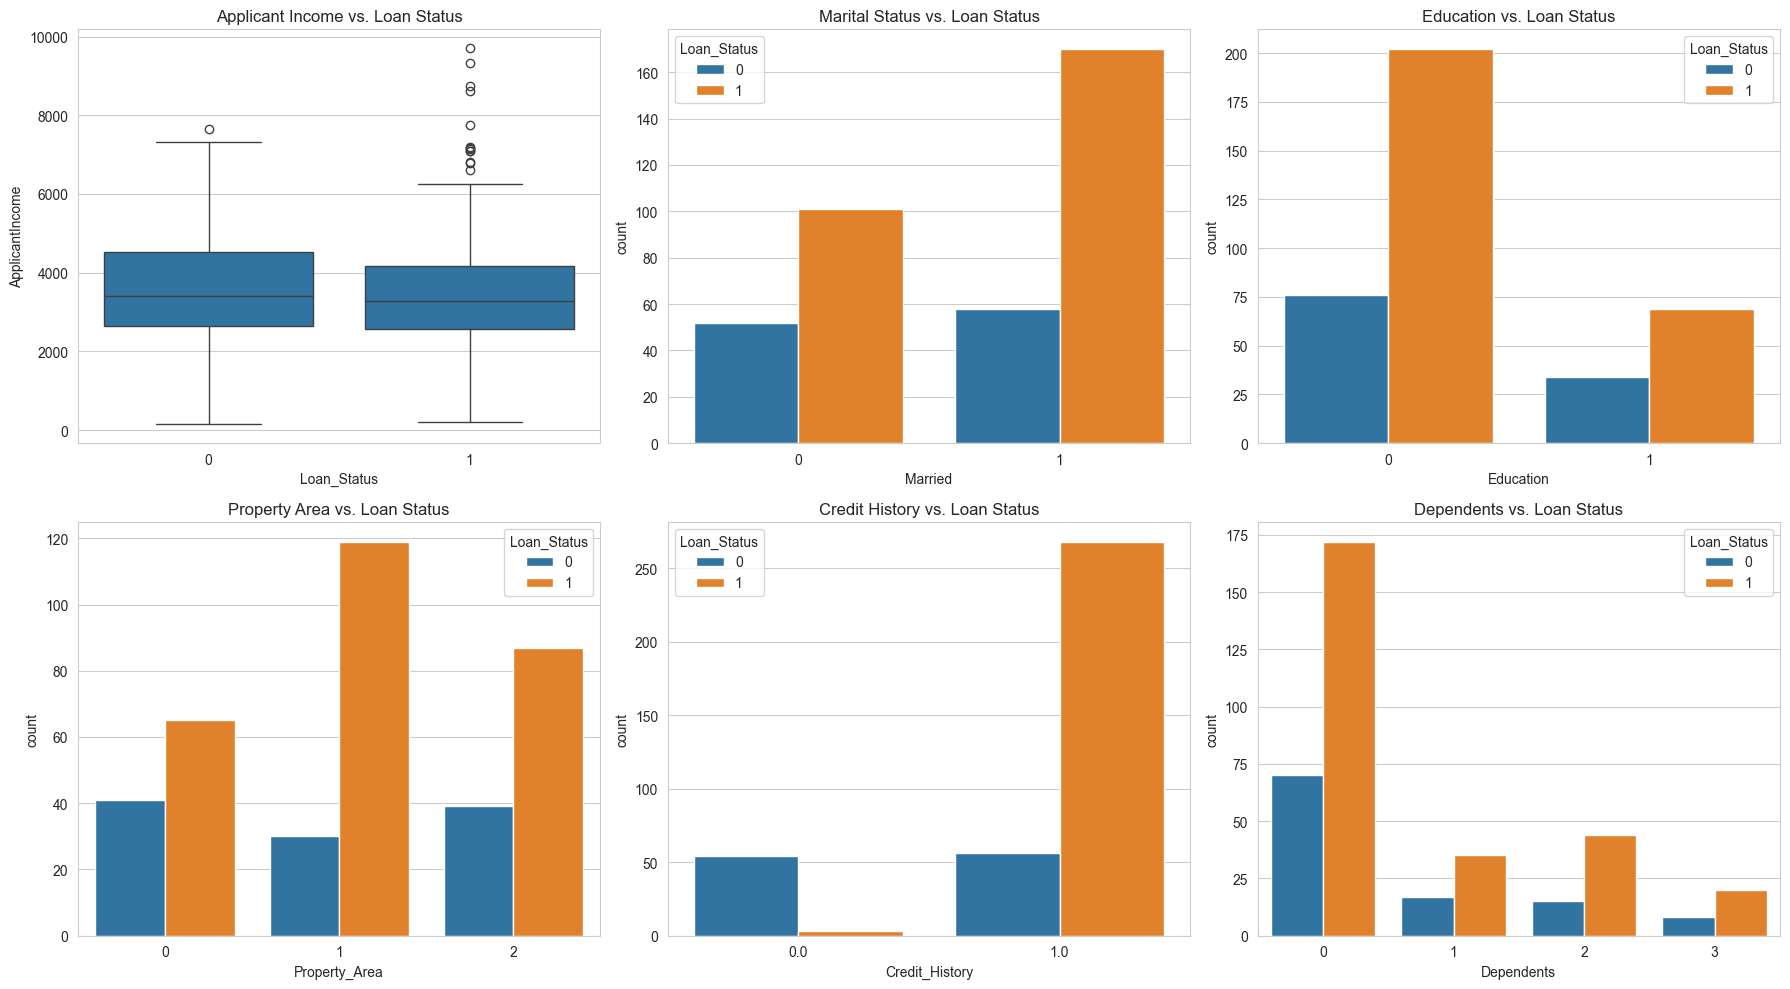

In [4]:

import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Income vs. Loan Status
sns.boxplot(ax=axes[0, 0], x='Loan_Status', y='ApplicantIncome', data=loan_data)
axes[0, 0].set_title('Applicant Income vs. Loan Status')

# Marital Status vs. Loan Status
sns.countplot(ax=axes[0, 1], x='Married', hue='Loan_Status', data=loan_data)
axes[0, 1].set_title('Marital Status vs. Loan Status')

# Education vs. Loan Status
sns.countplot(ax=axes[0, 2], x='Education', hue='Loan_Status', data=loan_data)
axes[0, 2].set_title('Education vs. Loan Status')

# Property Area vs. Loan Status
sns.countplot(ax=axes[1, 0], x='Property_Area', hue='Loan_Status', data=loan_data)
axes[1, 0].set_title('Property Area vs. Loan Status')

# Credit History vs. Loan Status
sns.countplot(ax=axes[1, 1], x='Credit_History', hue='Loan_Status', data=loan_data)
axes[1, 1].set_title('Credit History vs. Loan Status')

# Dependents vs. Loan Status
sns.countplot(ax=axes[1, 2], x='Dependents', hue='Loan_Status', data=loan_data)
axes[1, 2].set_title('Dependents vs. Loan Status')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preparing data for modeling
X = loan_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan_data['Loan_Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logistic_model.predict(X_test)

# Calculating the accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, class_report, conf_matrix


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8181818181818182,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.33      0.50        21\n           1       0.80      1.00      0.89        56\n\n    accuracy                           0.82        77\n   macro avg       0.90      0.67      0.69        77\nweighted avg       0.85      0.82      0.78        77\n',
 array([[ 7, 14],
        [ 0, 56]], dtype=int64))

# optuna
# amalops
# abhishak tahkur :- ml